In [1]:
import torch
import numpy as np
from model import Model
from plotter import Plotter
from backup_manager import BackupManager
from diagnostics import Diagnostics

In [2]:
model = BackupManager.load_model_basic(directory="models/training_3")

Model loaded from models/training_3/epoch_135.pkl


In [3]:
files = BackupManager.detect_files("data/main")[-10:] # 10 last files
raw_data, raw_parameters, _ = BackupManager.load_data(files)
data = model.normalizer.normalize_data(raw_data)
parameters = model.normalizer.normalize_parameters(raw_parameters)

Loading files:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
Diagnostics.simulation_based_calibration(model, data[:200], parameters[:200], num_posterior_samples=1000)

In [ ]:
Diagnostics.posterior_predictive_checks(model, x_o=data[-1], n_samples=200, n_points=1000)

In [ ]:
Diagnostics.expected_coverage_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

In [ ]:
Diagnostics.tarp_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

In [ ]:
Diagnostics.misspecification_test(model, data[-5002:-2], x_o=data[-1])

In [ ]:
Diagnostics.misspecification_test_mmd(model, data[-5002:-2], x_o=data[-1])

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/2 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

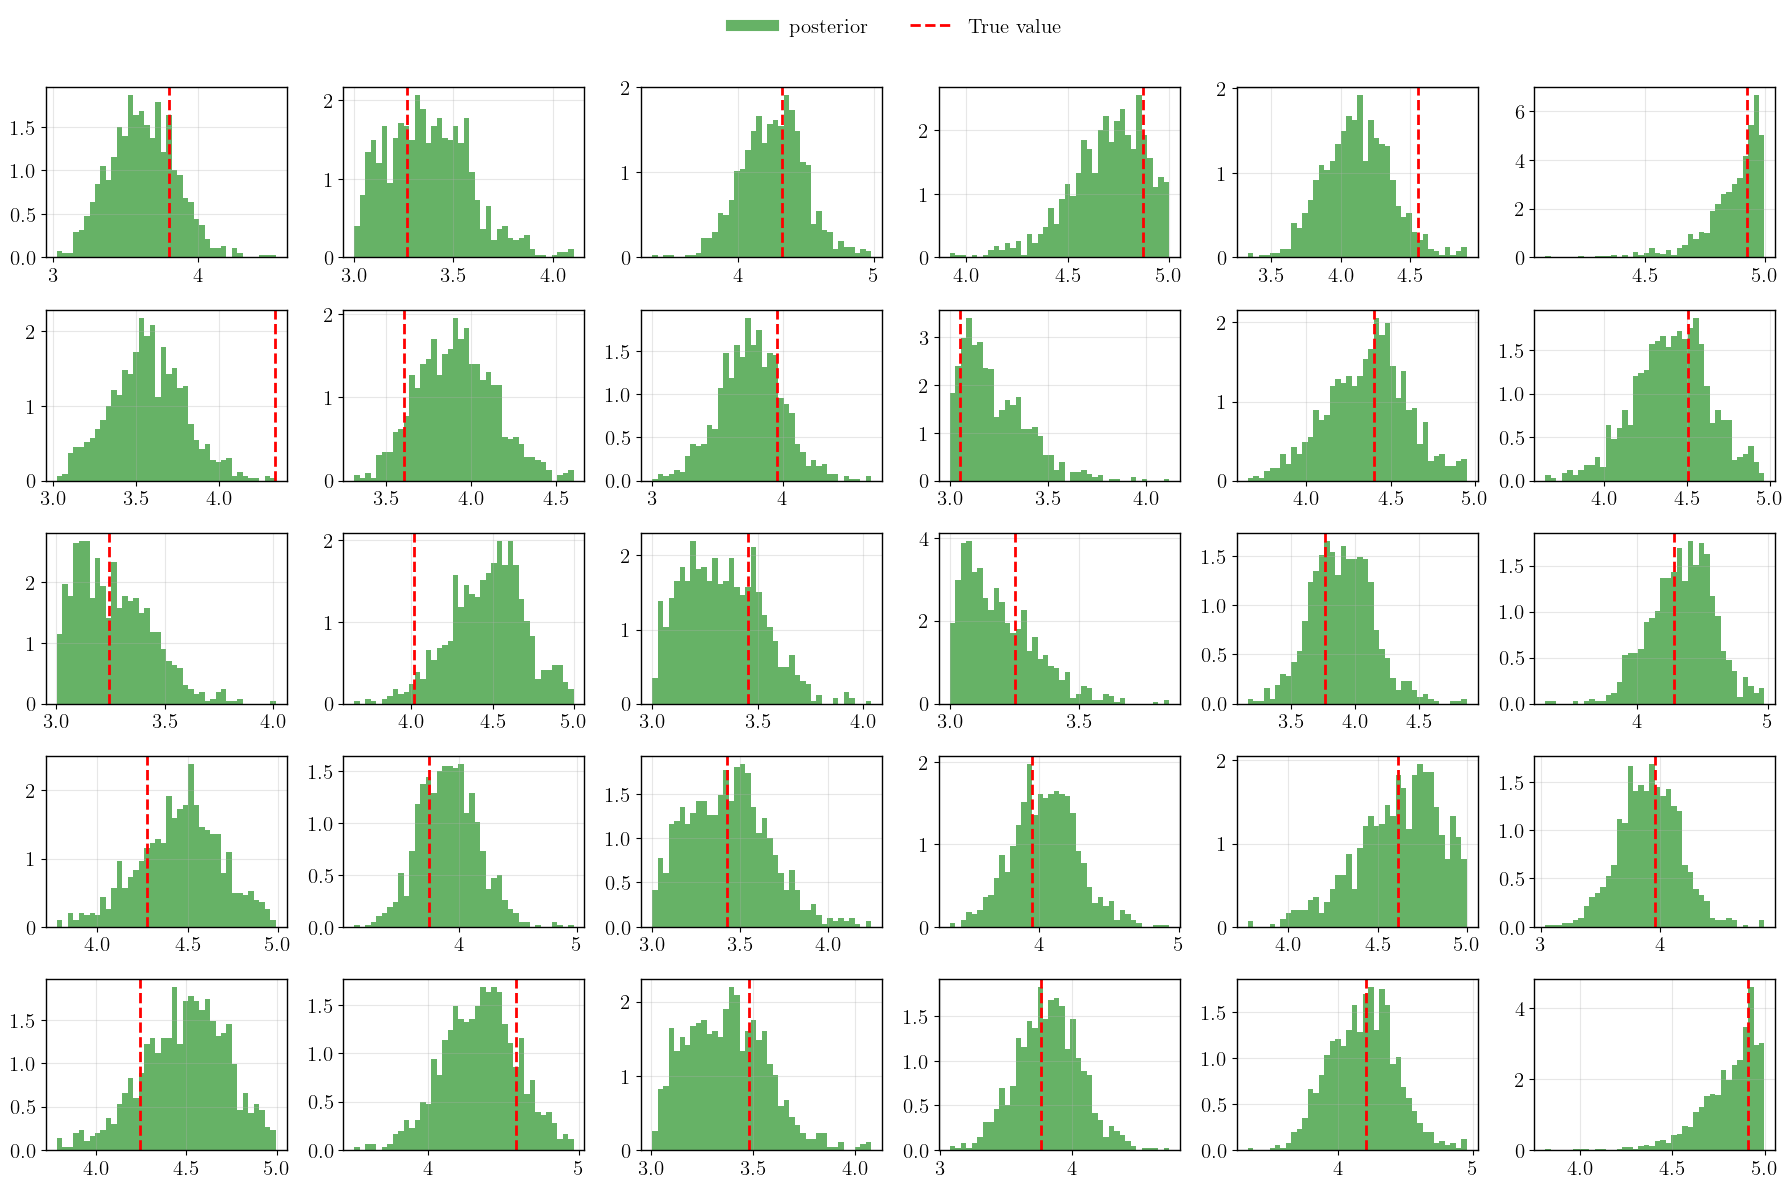

In [4]:
Diagnostics.many_posteriors(model, 0) # component 0 of the parameters (C_9)